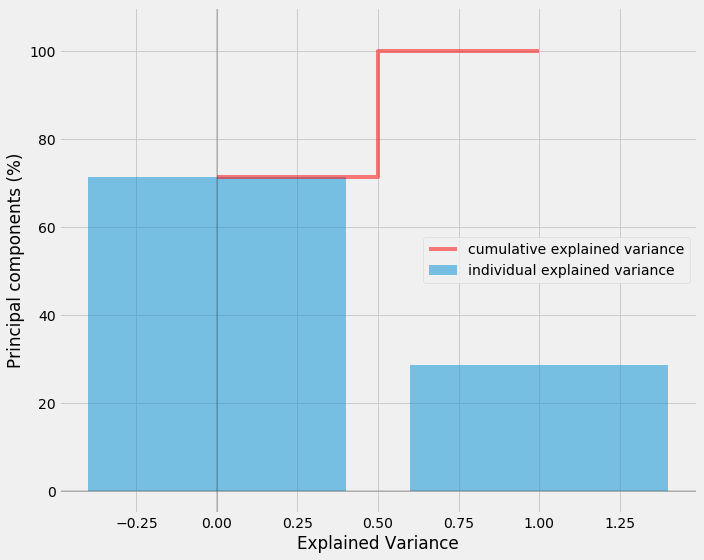

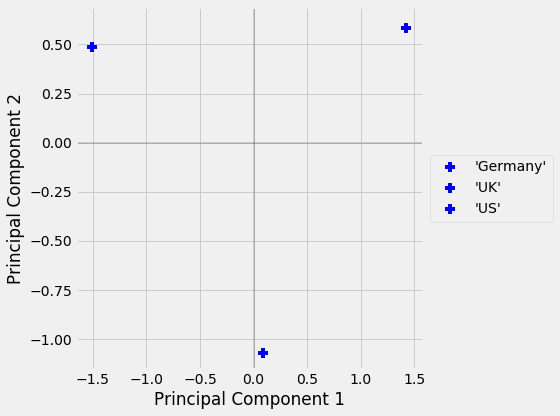

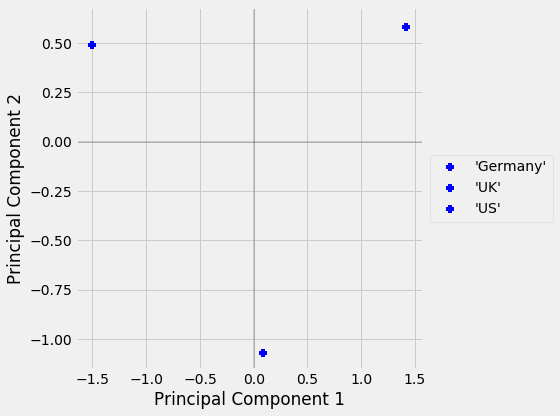

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle
cycol = next(cycle('bgrcmk'))

# Step 3. re-load data
myfilename = 'grouped_lookthrough.csv'
df = pd.read_csv(myfilename, header=None, sep=",")
df.columns=['region', 'sector', 'risk_measure']

# Step 4. reshape table
df2 = pd.pivot_table(df,columns=['region','sector'], aggfunc=[np.sum])
df3 = df2.unstack()
df3 = df3.fillna(0)

#  Step 5. extract feature count
feature_count = df3.iloc[1].values.shape[0]

# Step 6. split data table into data X and class label Y
x = df3.iloc[:,:].values
y = np.array([a[1] for a in df3.index.values])

from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

# Step 7. compute factors
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Step 8. rank eigen values
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals)) ]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Step 9. compute running sum & build projection matrix
tot = sum(eig_vals)
var_exp = [(i/tot)*100  for i in sorted(eig_vals, reverse=True) ]
cum_var_exp = np.cumsum(var_exp)
w = np.hstack((eig_pairs[0][1].reshape(feature_count,1), eig_pairs[1][1].reshape(feature_count,1)))

# Step 10. project original x onto w
Y = x_std.dot(w)

# Finally generate output viz
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,8))
    plt.bar(range(feature_count), var_exp, alpha=0.5, align='center', \
      label='individual explained variance')
    plt.step(range(feature_count), cum_var_exp, where='mid', \
      label='cumulative explained variance', color='red'
             , alpha=0.5)
    plt.xlabel('Explained Variance')
    plt.axhline(y=0, color='k', linewidth=0.3)
    plt.axvline(x=0, color='k', linewidth=0.3)
    plt.ylabel('Principal components (%)')
    plt.ylim(-5, 110)
    plt.legend(loc='best')
    plt.tight_layout()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    for lab, col in zip(y, [cycol for a in range(len(y))]):
        #print Y[y==lab, 0], Y[y==lab, 1]
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col, marker='+',s=100)
        xy = (Y[y==lab, 0].real, Y[y==lab, 1].real)
        if lab in ['Britain', 'UnitedStates', 'Australia', 'Germany', 'France']:
            plt.annotate('%s' % lab, xy=xy, textcoords='data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.axhline(y=0, color='k', linewidth=0.3)
    plt.axvline(x=0, color='k', linewidth=0.3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.title('Projection onto reduced dimensional feature space')
    plt.tight_layout()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    for lab, col in zip(y, [cycol for a in range(len(y))]):
       if lab not in ['Britain', 'UnitedStates', 'Germany', 'France']:
            plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col, marker='+',s=50)
            xy = (Y[y==lab, 0].real, Y[y==lab, 1].real)
            if lab in ['Britain', 'UnitedStates', 'Australia', 'Germany', 'France', 'Spain', 'Italy', 'Netherlands', 'Finland', 'Belgium', 'Switzerland']:
                plt.annotate('%s' % lab, xy=xy, textcoords='data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.axhline(y=0, color='k', linewidth=0.3)
    plt.axvline(x=0, color='k', linewidth=0.3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.title('Projection onto reduced dimensional feature space')
    plt.tight_layout()